In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

C:\ProgramData\Anaconda3\envs\[tf]\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [20]:
## used for resize and in our model
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [21]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [22]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)
print('Some dog images starting with 5 loaded')

Some dog images starting with 5 loaded


In [23]:
## Definition to load some our cat images (1,111 개 이미지)
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)
print('Some cat images starting with 5 loaded')

Some cat images starting with 5 loaded


In [24]:
classes = ['dog', 'cat']

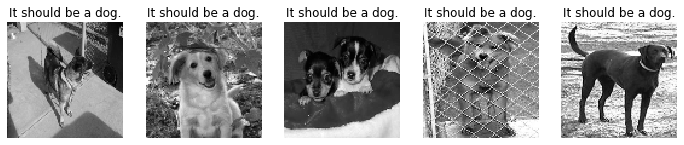

In [25]:
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

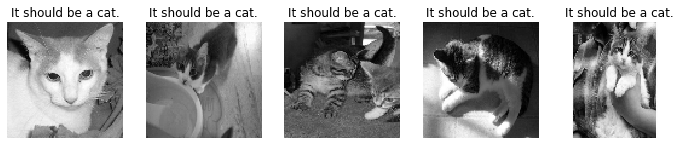

In [26]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [27]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [28]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32')
cats = np.asarray(cats).astype('float32')
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [29]:
## fit values between 0 and 1
dogs /= 255
cats /= 255

In [30]:
X = np.concatenate((dogs,cats), axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

In [31]:
IMG_CHANNEL = 1
BATCH_SIZE = 32
N_EPOCH = 40
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len(classes)

Instructions for updating:
Colocations handled automatically by placer.


In [32]:
## One-Hot Encoding
y = np_utils.to_categorical(y, N_CLASSES)
print('One-Hot Encoding done')

One-Hot Encoding done


In [33]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, IMG_CHANNEL), activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation='softmax')
])

print('The model was created by following config:')
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The model was created by following config:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)   

In [34]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

In [36]:
## to save checkpoint to use later
checkpoint = ModelCheckpoint('model_checkpoint/dogs_vs_cats_checkpoint.h5')
model.fit(X, y, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDAION_SPLIT,
          verbose=VERBOSE, callbacks=[checkpoint])

Train on 1777 samples, validate on 445 samples
Epoch 1/40
 - 47s - loss: 0.6649 - acc: 0.6252 - val_loss: 0.9977 - val_acc: 0.0000e+00
Epoch 2/40
 - 48s - loss: 0.6558 - acc: 0.6252 - val_loss: 0.8499 - val_acc: 0.0022
Epoch 3/40
 - 47s - loss: 0.6432 - acc: 0.6432 - val_loss: 0.9257 - val_acc: 0.1596
Epoch 4/40
 - 47s - loss: 0.6014 - acc: 0.6781 - val_loss: 0.7997 - val_acc: 0.2787
Epoch 5/40
 - 48s - loss: 0.5671 - acc: 0.7017 - val_loss: 1.1282 - val_acc: 0.2000
Epoch 6/40
 - 47s - loss: 0.5297 - acc: 0.7344 - val_loss: 1.1515 - val_acc: 0.2989
Epoch 7/40
 - 48s - loss: 0.4904 - acc: 0.7586 - val_loss: 0.8675 - val_acc: 0.4292
Epoch 8/40
 - 48s - loss: 0.4176 - acc: 0.8120 - val_loss: 0.9177 - val_acc: 0.4989
Epoch 9/40
 - 47s - loss: 0.3408 - acc: 0.8492 - val_loss: 0.9215 - val_acc: 0.5708
Epoch 10/40
 - 47s - loss: 0.2900 - acc: 0.8717 - val_loss: 0.7551 - val_acc: 0.6764
Epoch 11/40
 - 48s - loss: 0.2154 - acc: 0.9049 - val_loss: 1.6579 - val_acc: 0.4449
Epoch 12/40
 - 47s - lo

In [37]:
model_name = 'Dogs-and-Cats-1111-CNN'
## saving architecture
model_json = model.to_json()
open(model_name+'.json', 'w').write(model_json)
print('JSON saved')

## and the weights learned by our deep network on the training set
model.save(model_name+'.h5', overwrite=True)
print('.h5 saved')

model.save_weights(model_name+'_weights.h5', overwrite=True)
print('Weights saved in .h5 file')

JSON saved
.h5 saved
Weights saved in .h5 file
